<a href="https://colab.research.google.com/github/imamd46/TUGAS-TIME-SERIES/blob/main/Time_Series_Forecasting_(Advanced)_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and Load Packages

In [2]:
!pip install sktime[all_extras]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 4.8 MB/s 
     |████████████████████████████████| 9.8 MB 33.1 MB/s 
     |████████████████████████████████| 3.3 MB 21.0 MB/s 
     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 177 kB 47.8 MB/s 
     |████████████████████████████████| 6.9 MB 19.6 MB/s 
     |████████████████████████████████| 1.4 MB 46.0 MB/s 
     |████████████████████████████████| 793 kB 18.9 MB/s 
     |████████████████████████████████| 125 kB 52.7 MB/s 
     |████████████████████████████████| 136 kB 41.4 MB/s 
     |████████████████████████████████| 228 kB 34.7 MB/s 
     |████████████████████████████████| 97 kB 5.4 MB/s 
     |████████████████████████████████| 11.2 MB 31.7 MB/s 
     |████████████████████████████████| 623 kB 58.0 MB/s 
     |████████████████████████████████| 65 kB 4.1 MB/s 
     |███████████████████████████████

In [1]:
# utilities packages
import datetime

# data wrangling and transformation package
import numpy as np
import pandas as pd
import statsmodels.api as sm

# data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# time series modeling
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.stats.diagnostic import acorr_ljungbox

# load sktime for time series forecasting
from sktime.utils.plotting import plot_series # from plotting
from sktime.forecasting.naive import NaiveForecaster # for naive forecasting
from sktime.forecasting.arima import AutoARIMA # for automated ARIMA forecasting
from sktime.forecasting.exp_smoothing import ExponentialSmoothing # for exponential smoothing forecasting
from sktime.forecasting.ets import AutoETS # for automated ETS forecasting 
from sktime.forecasting.tbats import TBATS # for TBATS forecasting
from sktime.forecasting.fbprophet import Prophet # for Prophet forecasting
from sktime.forecasting.base import ForecastingHorizon # for creating forecast horizon
from sktime.forecasting.model_selection import (
    temporal_train_test_split, 
    ExpandingWindowSplitter, 
    SlidingWindowSplitter
) # for train-test split and cross validation
from sktime.performance_metrics.forecasting import (
    mean_absolute_error, 
    mean_squared_error, 
    mean_absolute_percentage_error
) # for evaluation metrics
from sktime.forecasting.model_evaluation import evaluate # for evaluating CV results

%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/superstore_time_series_dataset/superstore_train.csv")

# Preprocess Data

In [3]:
# check the first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# check data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8000 non-null   int64  
 1   Order ID       8000 non-null   object 
 2   Order Date     8000 non-null   object 
 3   Ship Date      8000 non-null   object 
 4   Ship Mode      8000 non-null   object 
 5   Customer ID    8000 non-null   object 
 6   Customer Name  8000 non-null   object 
 7   Segment        8000 non-null   object 
 8   Country        8000 non-null   object 
 9   City           8000 non-null   object 
 10  State          8000 non-null   object 
 11  Postal Code    8000 non-null   int64  
 12  Region         8000 non-null   object 
 13  Product ID     8000 non-null   object 
 14  Category       8000 non-null   object 
 15  Sub-Category   8000 non-null   object 
 16  Product Name   8000 non-null   object 
 17  Sales          8000 non-null   float64
 18  Quantity

# 1. Jumlah pembeli, jumlah transaksi, GMV, dan profit yang diperoleh dengan rentang waktu 
* Harian
* Mingguan
* Bulanan


In [5]:
# create Order Date column
df['Order Date'] = pd.to_datetime(df['Order Date']).dt.normalize()

# create gmv column based on (Sales-(Sales*Diskon)) * Quantity
df["gmv"] = (df["Sales"] - (df["Sales"] * df["Discount"])) * df["Quantity"]

In [6]:
# create indexing Order Date
df.index = pd.to_datetime(df['Order Date'])
df.drop(["Order Date"], axis=1, inplace=True)
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,gmv
Order Date,,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.920000
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.820000
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.240000
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2633.338125
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,35.788800


In [8]:
# Aggregate data
df1 = df.groupby('Order Date').agg({
    "Customer ID": 'nunique',
    "gmv": 'sum',
    "Profit": 'sum'
}).query("gmv > 0")

In [9]:
# Renaming
df1 = df1.rename(columns={"Customer ID": "Jumlah Pelanggan","gmv": "GMV"})

In [10]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1181 entries, 2014-01-03 to 2017-12-30
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Jumlah Pelanggan  1181 non-null   int64  
 1   GMV               1181 non-null   float64
 2   Profit            1181 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 36.9 KB


In [11]:
df1.head()

,Jumlah Pelanggan,GMV,Profit
Order Date,,,
2014-01-03,1,26.3168,5.5512
2014-01-04,1,684.2640,-65.9901
2014-01-05,1,46.8864,4.8840
2014-01-06,3,28430.7800,1358.0524
2014-01-07,1,106.6756,-71.9621


In [12]:
df1.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1181, freq=None)

In [13]:
# jumlah pembeli Harian 
Daily = df1.resample('D').sum().query("GMV > 0")
Daily.head()

,Jumlah Pelanggan,GMV,Profit
Order Date,,,
2014-01-03,1,26.3168,5.5512
2014-01-04,1,684.2640,-65.9901
2014-01-05,1,46.8864,4.8840
2014-01-06,3,28430.7800,1358.0524
2014-01-07,1,106.6756,-71.9621


In [14]:
import pandas as pd
import plotly.graph_objs as go 

line1 = go.Scatter(
    x=df1.index,
    y=df1['GMV'],
    mode='lines+markers',
    marker={'symbol':'square'},
    name='GMV'
)
line2 = go.Scatter(
    x=df1.index,
    y=df1['Profit'],
    mode='lines+markers',
    name='Profit'
)
data = [line1,line2]
fig = go.Figure(data=data)
fig


In [15]:
# jumlah pembeli Mingguan dengan GMV >= 0
weekly = df1.resample('W').sum().query("GMV > 0")
weekly

,Jumlah Pelanggan,GMV,Profit
Order Date,,,
2014-01-05,3,757.467200,-55.5549
2014-01-12,7,28701.996000,1322.7434
2014-01-19,8,21346.196850,388.3147
2014-01-26,5,17515.545800,689.9281
2014-02-02,6,4855.614600,238.1987
...,...,...,...
2017-12-03,54,130340.445300,1651.8166
2017-12-10,50,88098.961300,903.6503
2017-12-17,28,23556.486100,143.6562


In [16]:
# jumlah pembeli Bulanan dengan GMV >= 0
monthly=df1.resample('M').sum().query("GMV > 0")
monthly

,Jumlah Pelanggan,GMV,Profit
Order Date,,,
2014-01-31,27,70301.670450,2371.5095
2014-02-28,17,14306.863200,617.6065
2014-03-31,54,179793.057300,-103.8131
2014-04-30,51,102803.443650,2426.8582
2014-05-31,56,73994.537500,2375.0458
2014-06-30,55,131470.708832,4288.7032
2014-07-31,51,112258.854400,2609.1479
2014-08-31,55,90606.011725,4004.9768
2014-09-30,103,281115.398858,5867.6780


In [17]:
df3 = df.groupby(['Customer Name',]).agg({
    'Order Date':'nunique'
})
df3.head()

KeyError: ignored

# Identifikasi produk-produk apa saja yang membawa profit terbesar dalam 3 bulan terakhir 

In [18]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,gmv
Order Date,,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.920000
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.820000
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.240000
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2633.338125
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,35.788800


In [19]:
df2 = df.groupby(['Order Date','Sub-Category']).agg({
    'Profit':'sum'
})
df2.head()

Profit
Order Date Sub-Category         
2014-01-03 Paper          5.5512
2014-01-04 Binders       -5.4870
           Labels         4.2717
           Storage      -64.7748
2014-01-05 Art            4.8840

In [20]:
df2

Profit
Order Date Sub-Category         
2014-01-03 Paper          5.5512
2014-01-04 Binders       -5.4870
           Labels         4.2717
           Storage      -64.7748
2014-01-05 Art            4.8840
...                          ...
2017-12-30 Appliances    56.5110
           Binders       30.7848
           Bookcases     12.1176
           Fasteners     -0.6048
           Phones         2.7279

[5534 rows x 1 columns]

In [43]:
df2.index()

TypeError: ignored

# Forecasting: Naive Model

**Google Stocks**

## Exploration

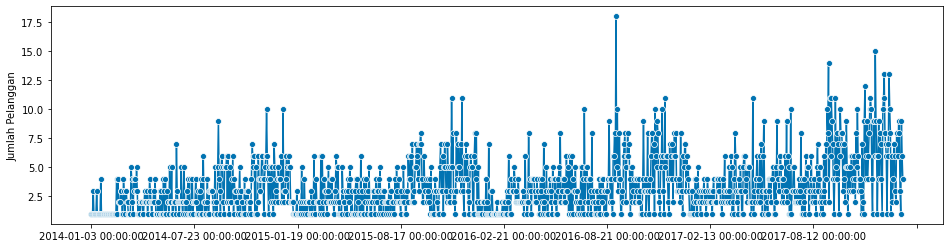

In [26]:
plot_series(Daily['Jumlah Pelanggan']);

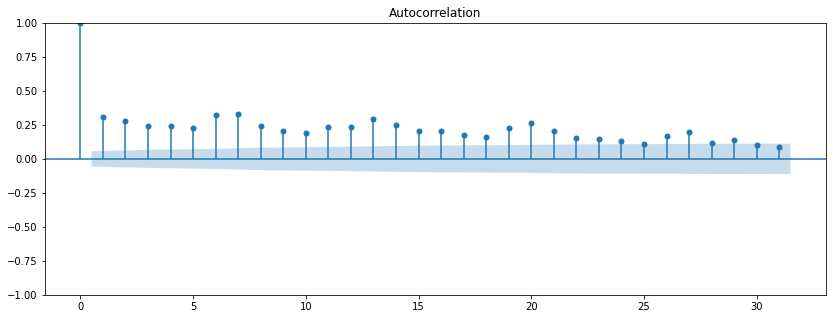

In [23]:
plot_acf(Daily['Jumlah Pelanggan']).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



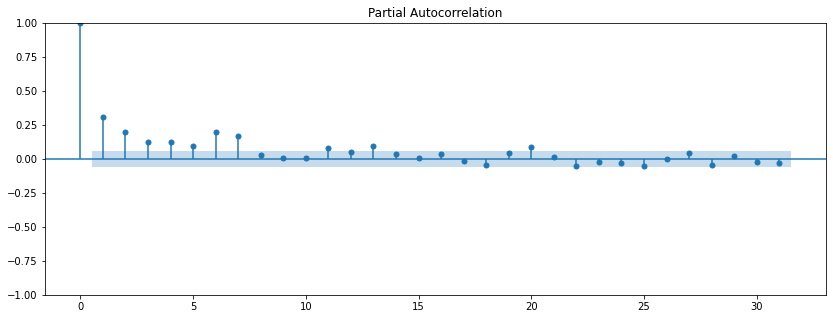

In [27]:
plot_pacf(Daily['Jumlah Pelanggan']).set_size_inches((14,5));

## Modeling

**Train-Test Split**

In [28]:
# Do train-test split
y_train, y_test = temporal_train_test_split(Daily['Jumlah Pelanggan'], test_size=30)

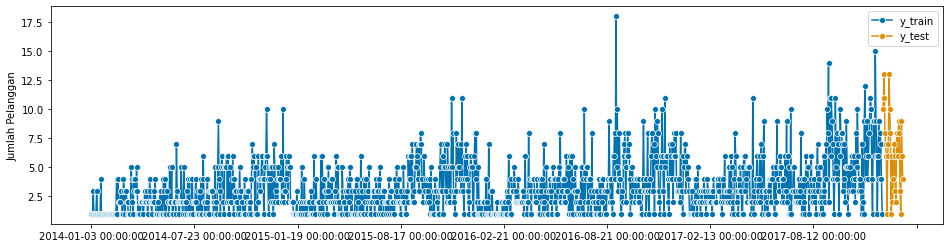

In [29]:
# check the time series after splitting
plot_series(y_train, y_test, labels=["y_train", "y_test"]);

In [30]:
#specific data points
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [31]:
fh

ForecastingHorizon(['2017-11-30', '2017-12-01', '2017-12-02', '2017-12-03',
               '2017-12-04', '2017-12-05', '2017-12-06', '2017-12-07',
               '2017-12-08', '2017-12-09', '2017-12-10', '2017-12-11',
               '2017-12-13', '2017-12-14', '2017-12-15', '2017-12-16',
               '2017-12-17', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', freq=None, is_relative=False)

**Modeling**

In [32]:
# define NaiveForecaster model
naive_forecaster = NaiveForecaster(strategy="last", sp=1)

In [33]:
# fit model to train data
naive_forecaster.fit(y = y_train)

NaiveForecaster()

**Prediction**

In [36]:
y_pred = naive_forecaster.predict(fh)

/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:601: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.



AttributeError: ignored

In [35]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

NameError: ignored

## Diagnostics

**Normality of residuals**

In [ ]:
# find residuals
residuals = y_test - y_pred

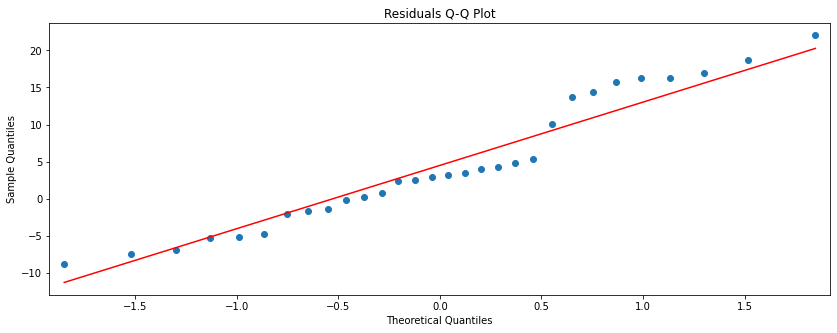

In [ ]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

**Residual Random Walk Pattern**

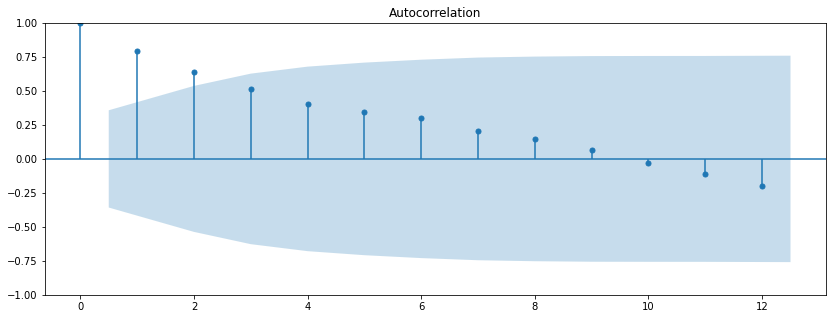

In [ ]:
# ACF plot
plot_acf(
    residuals, 
    lags = 12
).set_size_inches((14,5));

**Autocorrelation Test using Ljung-Box Test**

- *Null hypothesis*: The residuals are independently distributed.
- *Alternate hypothesis*: The residuals are not independently distributed; they exhibit serial correlation.

Reject null hypothesis if **p-value less than 5%**



In [ ]:
sm.stats.acorr_ljungbox(residuals, lags = 10, return_df=True)

,lb_stat,lb_pvalue
1,20.739294,5.262498e-06
2,34.821127,2.745923e-08
3,44.162705,1.393728e-09
4,50.101684,3.438581e-10
5,54.700350,1.504415e-10
6,58.333362,9.807840e-11
7,60.097475,1.443396e-10
8,61.070075,2.873203e-10
9,61.247585,7.702240e-10
10,61.299977,2.055268e-09


**Interpretation**: Because p-value less than 5%, then we can reject the null hypothesis of the test and conclude that the residuals are not independent.

## Model Evaluation

**Mean Absolute Error**

In [ ]:
mean_absolute_error(y_test, y_pred)

7.37701636666666

**Mean Squared Error**

In [ ]:
mean_squared_error(y_test, y_pred)

92.92279578801832

**Root Mean Square Error**

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

9.639647077980516

**Mean Absolute Percentage Error**

In [ ]:
mean_absolute_percentage_error(y_test, y_pred) * 100

1.420026467391403

## Cross-Validation

In [ ]:
# define NaiveForecaster model
naive_forecaster = NaiveForecaster(strategy="last", sp=1)

In [ ]:
# define CV object
cv = ExpandingWindowSplitter(
    initial_window = 100,
    step_length = 10,
    fh = [1, 2, 3, 4, 5,6,7,8,9,10]
)

In [ ]:
results = evaluate(forecaster=naive_forecaster, y=y_train, cv=cv, strategy="refit", return_data=True)

In [ ]:
# check results from CV
results

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff,y_train,y_test,y_pred
0,0.025448,0.006244,0.003963,100,99,0 392.830017 1 392.512085 2 397.30...,100 452.397583 101 445.403076 102 452...,100 456.307159 101 456.307159 102 456...
1,0.011015,0.004507,0.003965,110,109,0 392.830017 1 392.512085 2 397...,110 449.188477 111 450.355865 112 449...,110 441.006683 111 441.006683 112 441...
2,0.009434,0.004316,0.003729,120,119,0 392.830017 1 392.512085 2 397...,120 427.052429 121 425.686310 122 430...,120 432.094635 121 432.094635 122 432...
3,0.031338,0.004445,0.003707,130,129,0 392.830017 1 392.512085 2 397...,130 424.951111 131 420.713654 132 427...,130 421.533325 131 421.533325 132 421...
4,0.009614,0.007313,0.006078,140,139,0 392.830017 1 392.512085 2 397...,140 441.662415 141 441.011658 142 440...,140 443.644531 141 443.644531 142 443...
5,0.011523,0.004318,0.003745,150,149,0 392.830017 1 392.512085 2 397...,150 435.363373 151 435.124939 152 440...,150 436.24762 151 436.24762 152 436.2...
6,0.081075,0.004193,0.003597,160,159,0 392.830017 1 392.512085 2 397...,160 433.177612 161 435.224274 162 438...,160 431.314728 161 431.314728 162 431...


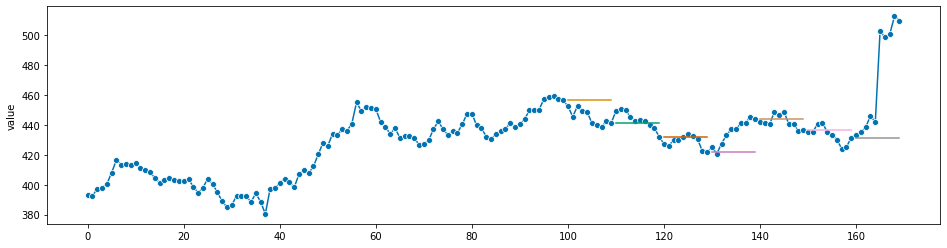

In [ ]:
# plot CV results
plot_series(
    y_train,
    results["y_pred"].iloc[0],
    results["y_pred"].iloc[1],
    results["y_pred"].iloc[2],
    results["y_pred"].iloc[3],
    results["y_pred"].iloc[4],
    results["y_pred"].iloc[5],
    results["y_pred"].iloc[6],
    markers=["o", "", "", "", "", "", "", ""]
);

## Task

Create the same model for air passengers data, don't forget to cross-validate it!

# ARIMA Model

## Exploration

**Air Passengers**

In [38]:
# plot time series data
plot_series(Daily);

ValueError: ignored

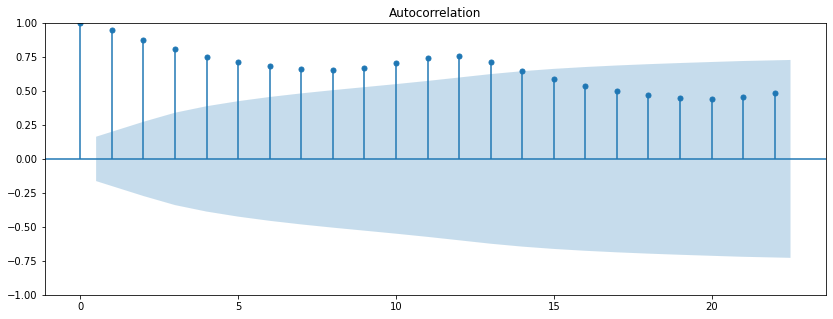

In [ ]:
# plot ACF
plot_acf(air_passengers).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


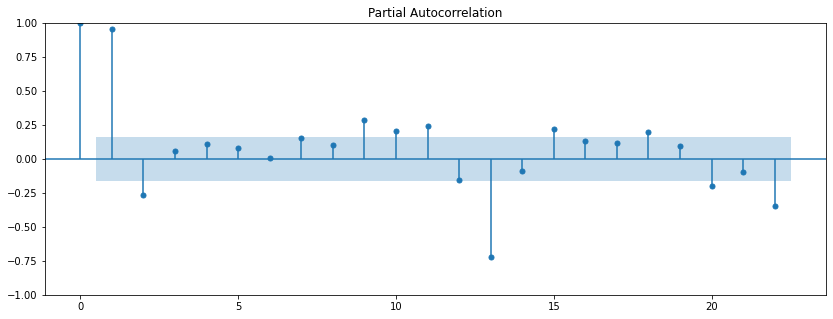

In [ ]:
# plot PACF
plot_pacf(air_passengers).set_size_inches((14,5));

**Differenced Version of Air Passengers Data**

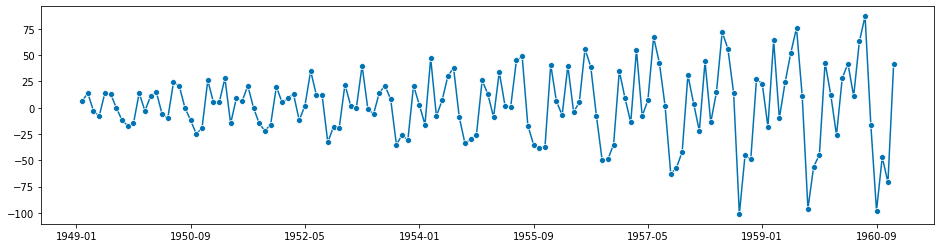

In [ ]:
# plot time series data
plot_series(air_passengers.diff());

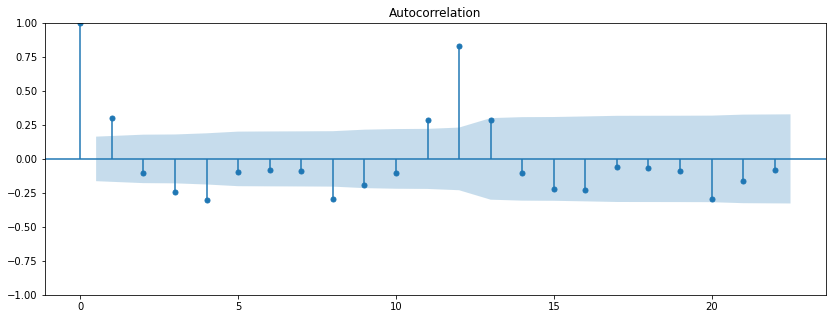

In [ ]:
# plot ACF
plot_acf(air_passengers.diff().dropna()).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


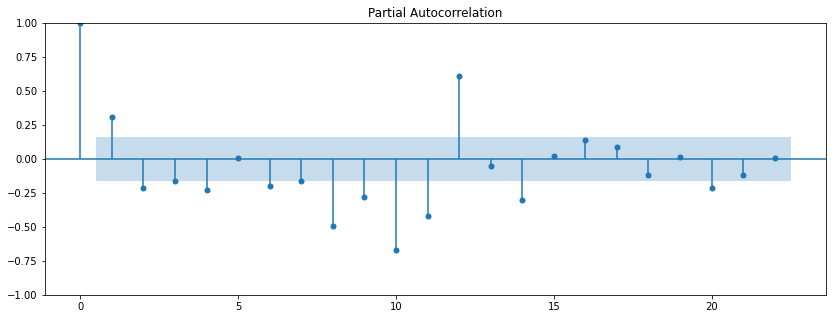

In [ ]:
# plot PACF
plot_pacf(air_passengers.diff().dropna()).set_size_inches((14,5));

**Log-transformed Version of Air Passengers Data**

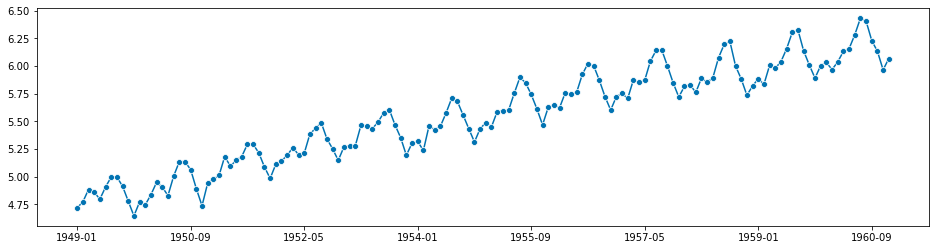

In [ ]:
# plot time series data
plot_series(np.log(air_passengers));

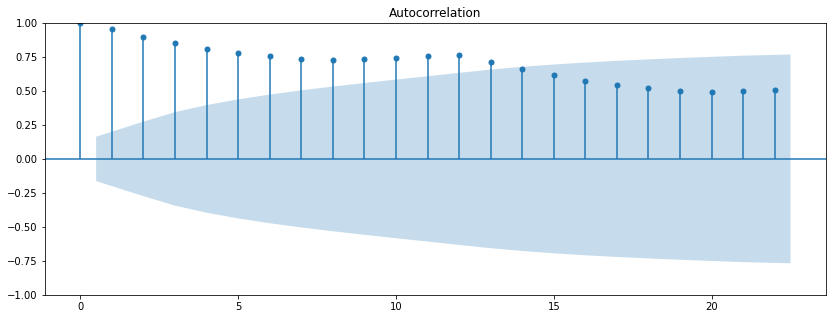

In [ ]:
# plot ACF
plot_acf(np.log(air_passengers)).set_size_inches((14,5));

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


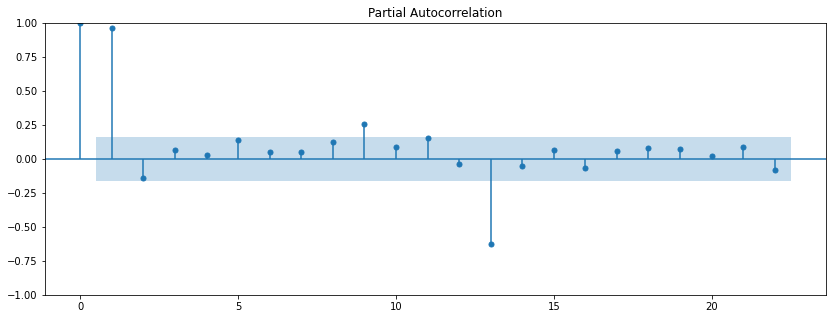

In [ ]:
# plot PACF
plot_pacf(np.log(air_passengers)).set_size_inches((14,5));

## Modeling

In [ ]:
# Do train-test split
y_train, y_test = temporal_train_test_split(air_passengers, test_size=36)

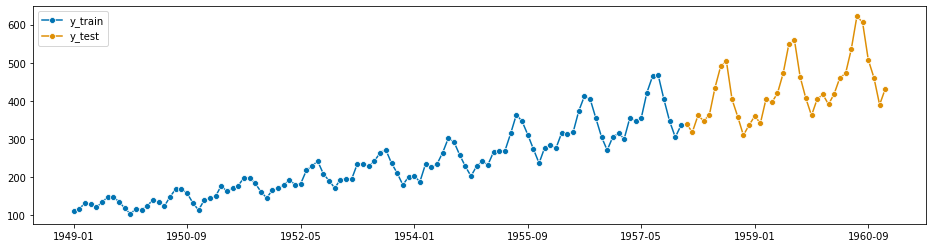

In [ ]:
# check the time series after splitting
plot_series(y_train, y_test, labels=["y_train", "y_test"]);

In [ ]:
#specific data points
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [ ]:
fh

ForecastingHorizon(['1958-01', '1958-02', '1958-03', '1958-04', '1958-05', '1958-06',
             '1958-07', '1958-08', '1958-09', '1958-10', '1958-11', '1958-12',
             '1959-01', '1959-02', '1959-03', '1959-04', '1959-05', '1959-06',
             '1959-07', '1959-08', '1959-09', '1959-10', '1959-11', '1959-12',
             '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', is_relative=False)

**Modeling**

In [ ]:
# define arima forecaster model
arima_forecaster = AutoARIMA(sp=12, suppress_warnings=True, random_state = 1000)

In [ ]:
# fit forecaster to train data
arima_forecaster.fit(y_train)

AutoARIMA(random_state=1000, sp=12, suppress_warnings=True)

**Prediction**

In [ ]:
# do prediction based on forecast horizon we already defined
y_pred_arima = arima_forecaster.predict(fh=fh)

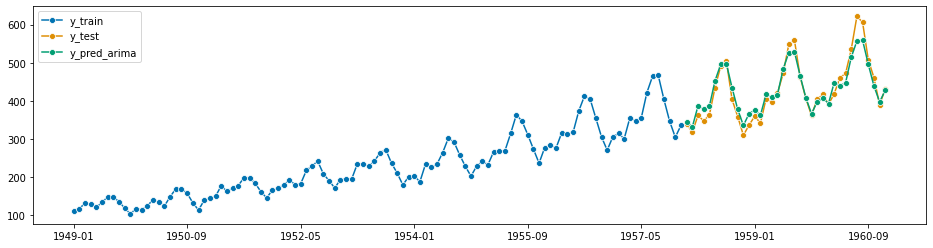

In [ ]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_arima, labels=["y_train", "y_test", "y_pred_arima"]);

**Check Model Specs**

In [ ]:
arima_forecaster.get_fitted_params()

{'aic': 704.0011679025909,
 'aicc': 704.1316026851996,
 'ar.L1': -0.2411177593160947,
 'bic': 709.108921685792,
 'hqic': 706.0650836395923,
 'order': (1, 1, 0),
 'seasonal_order': (0, 1, 0, 12),
 'sigma2': 92.74985957133522}

In [ ]:
arima_forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  108
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -350.001
Date:                            Sun, 26 Jun 2022   AIC                            704.001
Time:                                    03:09:52   BIC                            709.109
Sample:                                         0   HQIC                           706.065
                                            - 108                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2411      0.091     -2.648      0.008      -0.420      -0.063
sigma2        92.7499     13.439      6.902      0.000      66.410     119.090
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.92   Prob(JB):                         0.31
Heteroskedasticity (H):               0.92   Skew:                             0.38
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Model Diagnostics

In [ ]:
# find residuals
residuals = y_test - y_pred_arima

**Plot Residuals**

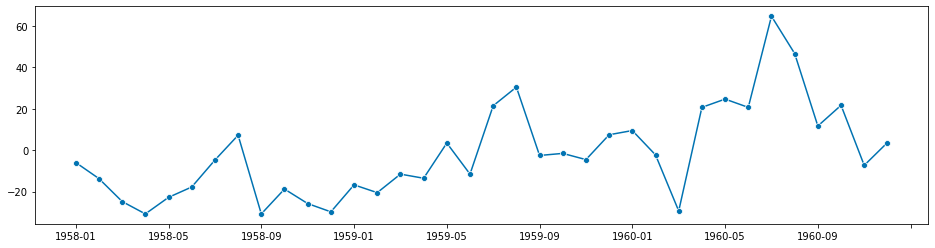

In [ ]:
plot_series(residuals);

**Normality of Residuals**

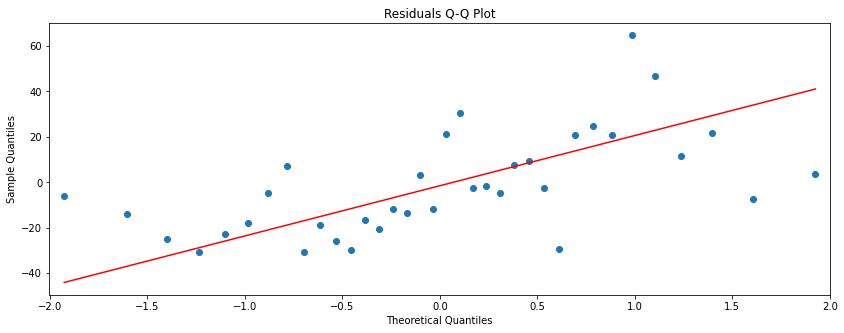

In [ ]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

<AxesSubplot:xlabel='Total Passengers', ylabel='Count'>

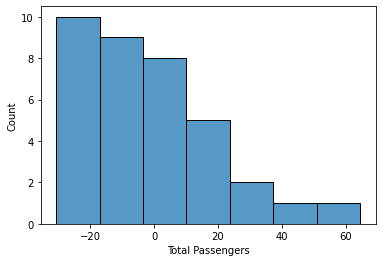

In [ ]:
sns.histplot(data = residuals, x = "Total Passengers")

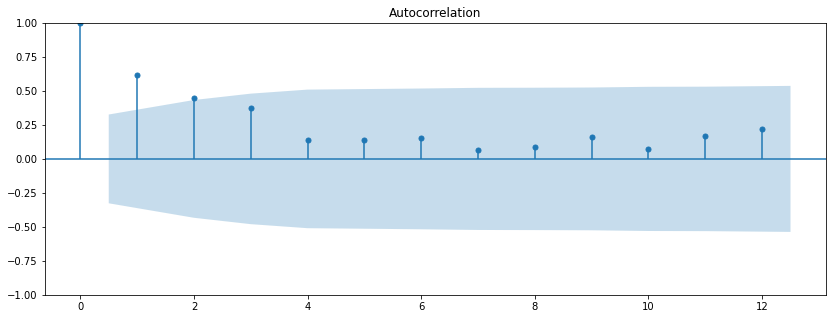

In [ ]:
# ACF plot
plot_acf(
    residuals, 
    lags = 12
).set_size_inches((14,5));

## Model Evaluation

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_arima) * 100

4.148971434138201

# Exponential Smoothing

## Modeling

In [ ]:
# define ets forecaster model
ets_forecaster = ExponentialSmoothing(trend='add', seasonal='multiplicative', sp=12)

In [ ]:
# fit forecaster to train data
ets_forecaster.fit(y_train)

ExponentialSmoothing(seasonal='multiplicative', sp=12, trend='add')

In [ ]:
# do prediction based on forecast horizon we already defined
y_pred_ets = ets_forecaster.predict(fh=fh)

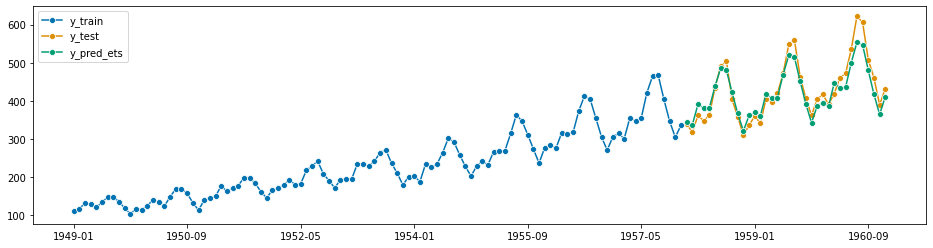

In [ ]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_ets, labels=["y_train", "y_test", "y_pred_ets"]);

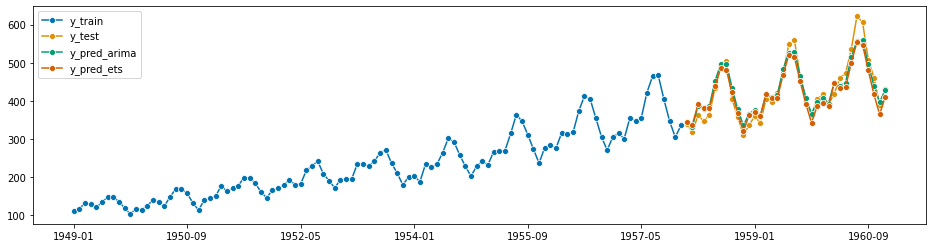

In [ ]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_arima, y_pred_ets, labels=["y_train", "y_test", "y_pred_arima", "y_pred_ets"]);

**Check Model Specs**

In [ ]:
ets_forecaster.get_fitted_params()

{'aic': 449.1269163465245,
 'aicc': 456.8123096049515,
 'bic': 492.04101598051204,
 'initial_level': 77.23670059068363,
 'initial_seasons': array([1.43861996, 1.39635093, 1.60943739, 1.55643601, 1.55314472,
        1.77220004, 1.95329423, 1.92080428, 1.67774264, 1.45028462,
        1.26147836, 1.41432164]),
 'initial_slope': None}

## Model Diagnostic

In [ ]:
# find residuals
residuals = y_test - y_pred_ets

**Plot Residuals**

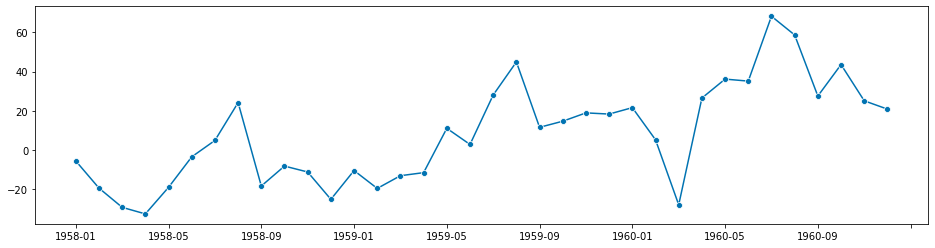

In [ ]:
plot_series(residuals);

**Normality of Residuals**

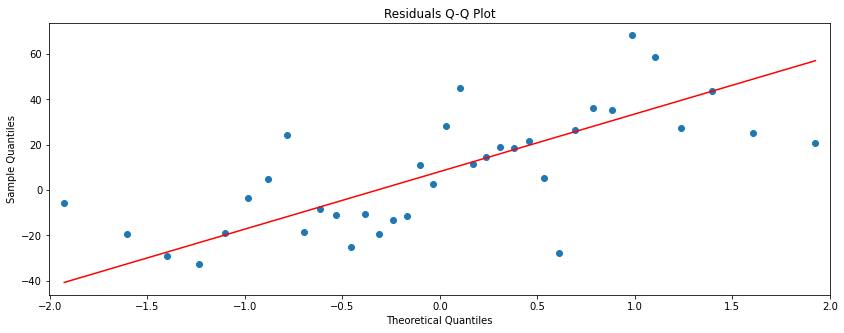

In [ ]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

<AxesSubplot:xlabel='Total Passengers', ylabel='Count'>

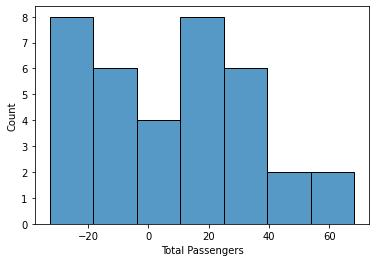

In [ ]:
sns.histplot(data = residuals, x = "Total Passengers")

**Randon Walk Pattern of Residuals**

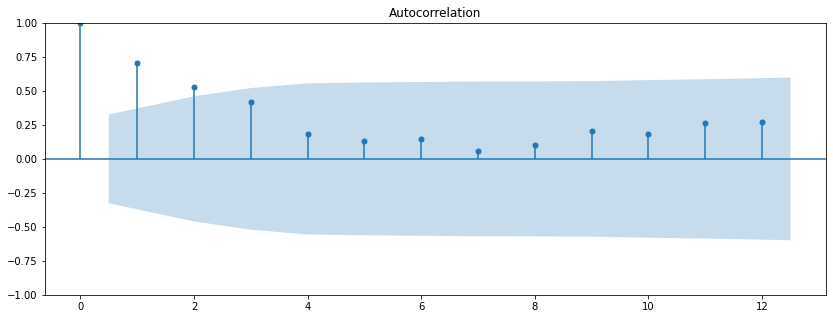

In [ ]:
# ACF plot
plot_acf(
    residuals, 
    lags = 12
).set_size_inches((14,5));

****

## Model Evaluation

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_ets) * 100

5.056484561299069

# AutoETS

## Modeling

In [ ]:
# define auto ets forecaster model
auto_ets_forecaster = AutoETS(auto=True, sp=12)

In [ ]:
# fit forecaster to train data
auto_ets_forecaster.fit(y_train)

AutoETS(auto=True, sp=12)

In [ ]:
# do prediction based on forecast horizon we already defined
y_pred_auto_ets = auto_ets_forecaster.predict(fh=fh)

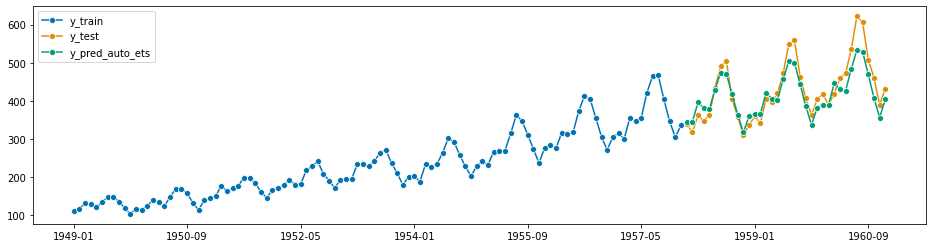

In [ ]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_auto_ets, labels=["y_train", "y_test", "y_pred_auto_ets"]);

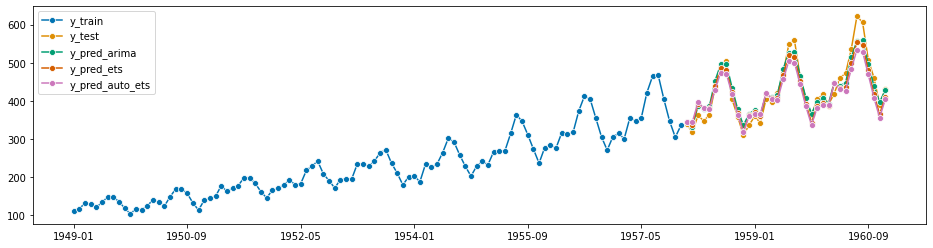

In [ ]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_arima, y_pred_ets, y_pred_auto_ets, labels=["y_train", "y_test", "y_pred_arima", "y_pred_ets", "y_pred_auto_ets"]);

## Model Diagnostic

In [ ]:
# find residuals
residuals = y_test - y_pred_auto_ets

**Plot Residuals**

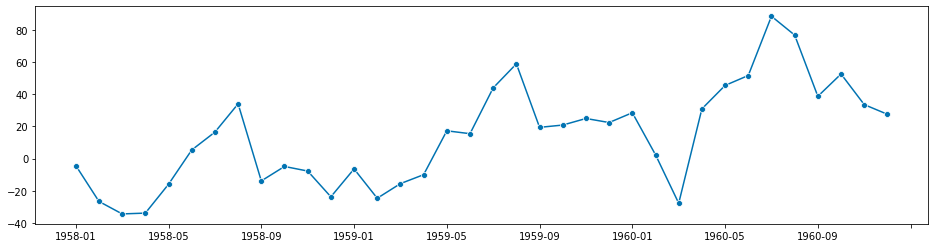

In [ ]:
plot_series(residuals);

**Normality of Residuals**

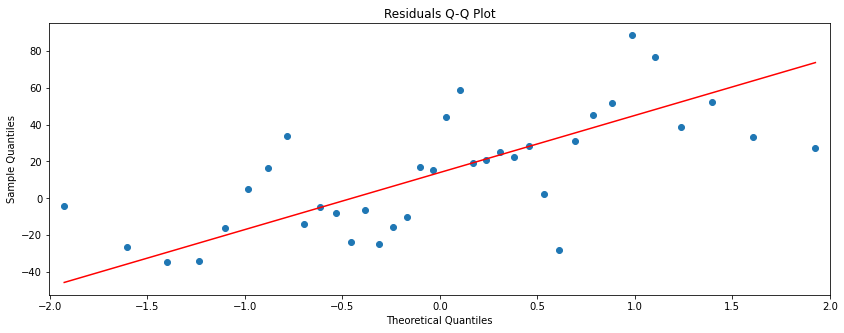

In [ ]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

<AxesSubplot:xlabel='Total Passengers', ylabel='Count'>

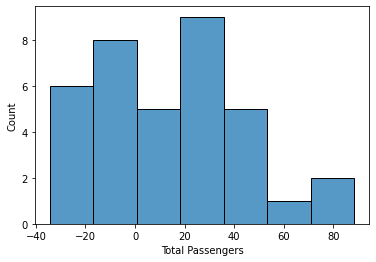

In [ ]:
sns.histplot(data = residuals, x = "Total Passengers")

**Random Walk Pattern of Residuals**

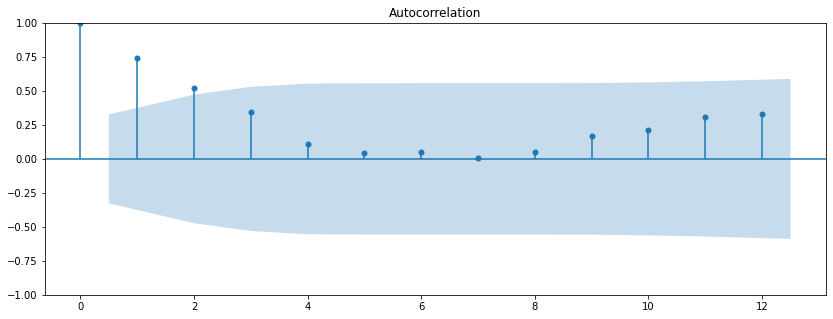

In [ ]:
# ACF plot
plot_acf(
    residuals, 
    lags = 12
).set_size_inches((14,5));

## Model Evaluation

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_auto_ets) * 100

6.185457205369252

# TBATS

## Modeling

**Modeling**

In [ ]:
# define TBATS model
tbats_forecaster = TBATS(sp=12)

In [ ]:
# fit forecaster to data
tbats_forecaster.fit(y_train)

TBATS(sp=12)

In [ ]:
# do prediction based on forecast horizon we already defined
y_pred_tbats = tbats_forecaster.predict(fh=fh)

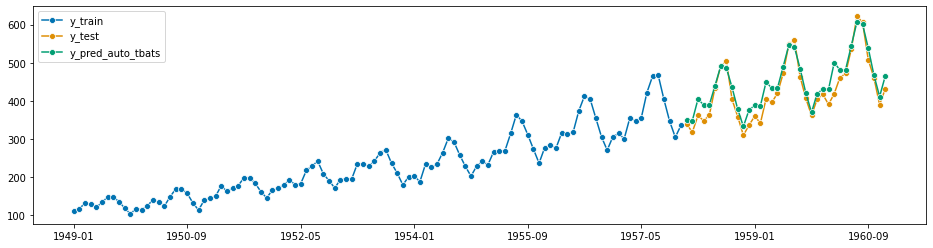

In [ ]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_tbats, labels=["y_train", "y_test", "y_pred_auto_tbats"]);

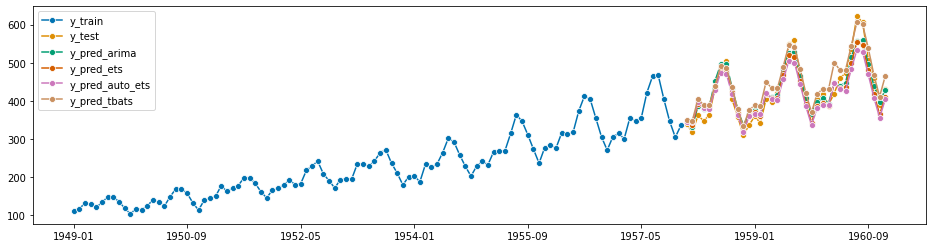

In [ ]:
# plot the forecast result
plot_series(
    y_train, y_test, y_pred_arima, y_pred_ets, y_pred_auto_ets, y_pred_tbats, 
    labels=["y_train", "y_test", "y_pred_arima", "y_pred_ets", "y_pred_auto_ets", "y_pred_tbats"]
);

## Model Diagnostic

In [ ]:
# find residuals
residuals = y_test - y_pred_tbats

**Plot Residuals**

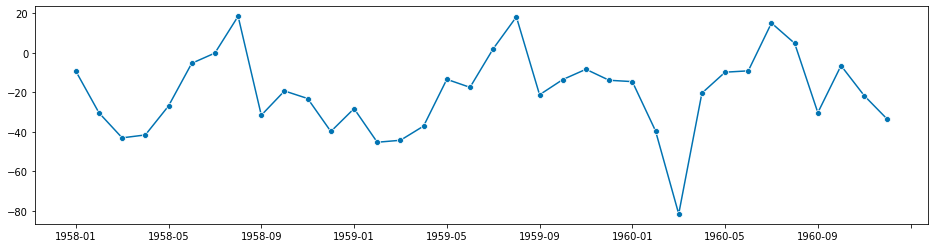

In [ ]:
plot_series(residuals);

**Normality of Residuals**

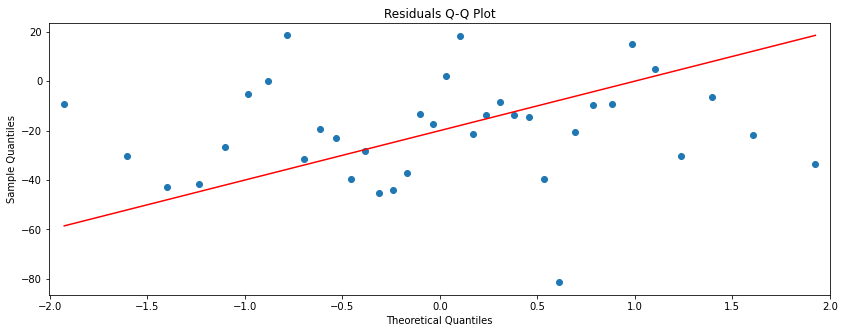

In [ ]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

<AxesSubplot:xlabel='Total Passengers', ylabel='Count'>

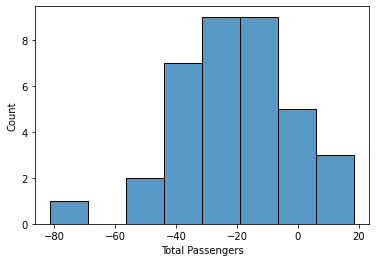

In [ ]:
sns.histplot(data = residuals, x = "Total Passengers")

**Random Walk Pattern of Residuals**

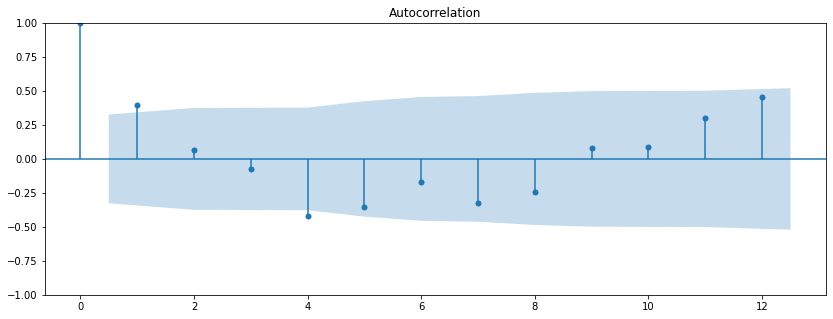

In [ ]:
# ACF plot
plot_acf(
    residuals, 
    lags = 12
).set_size_inches((14,5));

## Model Evaluation

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_tbats) * 100

5.871197440106204

# Prophet

## Modeling

**Re-preprocess Data**

In [ ]:
air_passengers = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/air_passanger_data/AirPassengers.csv")

In [ ]:
# change month column to date type
air_passengers['Month'] = pd.to_datetime(air_passengers['Month'], format="%Y-%m")

In [ ]:
# renaming certain column
air_passengers = air_passengers.rename(columns={
    "#Passengers": "Total Passengers",
    "Month": "Date"
})

In [ ]:
# set Date as index
air_passengers = air_passengers.set_index('Date')
air_passengers.index = pd.DatetimeIndex(air_passengers.index, freq = 'infer')

**Train-Test Split**

In [ ]:
# Do train-test split
y_train, y_test = temporal_train_test_split(air_passengers, test_size=36)

In [ ]:
#specific data points
fh = ForecastingHorizon(y_test.index, is_relative=False)

**Modeling**

In [ ]:
# define Prophet model
prophet_forecaster = Prophet(
    seasonality_mode='multiplicative', 
    yearly_seasonality = True,
    weekly_seasonality = False,
    daily_seasonality = False,
    add_country_holidays = {"country_name": "Australia"}
)

In [ ]:
# fit forecaster to data
prophet_forecaster.fit(y_train)

INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


Prophet(add_country_holidays={'country_name': 'Australia'},
        daily_seasonality=False, seasonality_mode='multiplicative',
        weekly_seasonality=False, yearly_seasonality=True)

In [ ]:
# do prediction based on forecast horizon we already defined
y_pred_prophet = prophet_forecaster.predict(fh=fh)

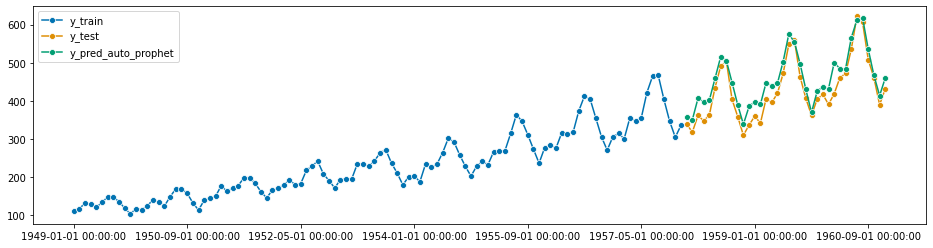

In [ ]:
# plot the forecast result
plot_series(y_train, y_test, y_pred_prophet, labels=["y_train", "y_test", "y_pred_auto_prophet"]);

**Set New Index Type**

In [ ]:
y_pred_prophet.index = pd.PeriodIndex(y_pred_prophet.index, freq = 'M')
y_train.index = pd.PeriodIndex(y_train.index, freq = 'M')
y_test.index = pd.PeriodIndex(y_test.index, freq = 'M')

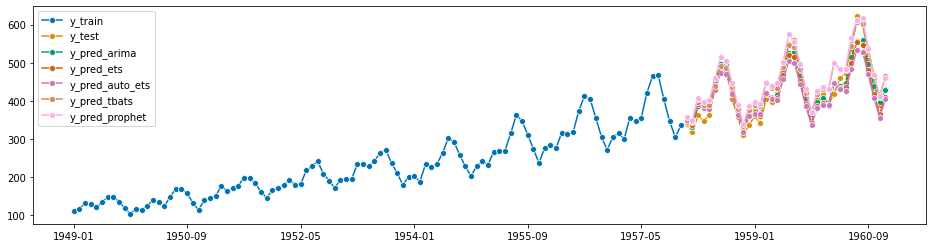

In [ ]:
# plot the forecast result
plot_series(
    y_train, y_test, y_pred_arima, y_pred_ets, y_pred_auto_ets, y_pred_tbats, y_pred_prophet,
    labels=["y_train", "y_test", "y_pred_arima", "y_pred_ets", "y_pred_auto_ets", "y_pred_tbats", "y_pred_prophet"]
);

## Model Diagnostics

In [ ]:
residuals = y_test - y_pred_prophet.rename(columns={"yhat":"Total Passengers"})

**Plot Residuals**

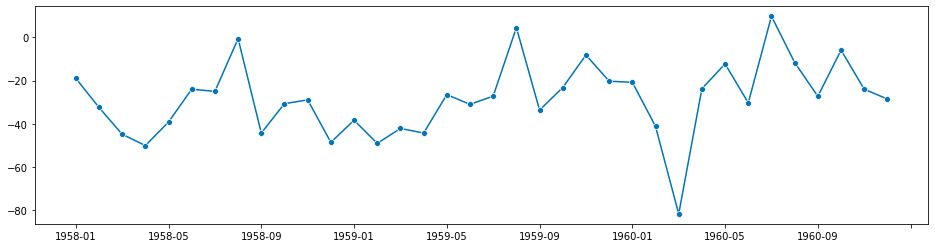

In [ ]:
plot_series(residuals);

**Normality of Residuals**

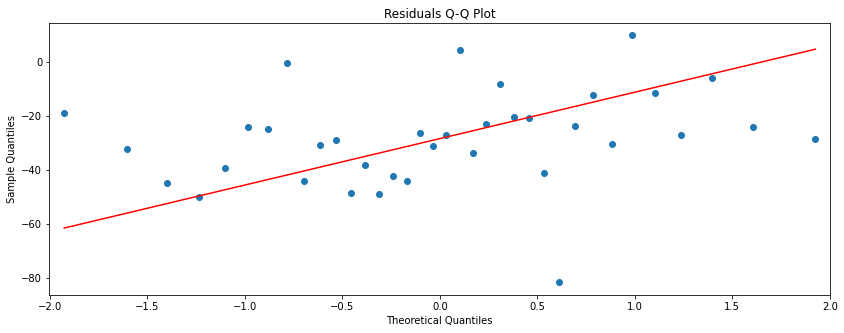

In [ ]:
sm.qqplot(residuals, line = 's').set_size_inches((14,5))
plt.title("Residuals Q-Q Plot")
plt.show()

<AxesSubplot:xlabel='Total Passengers', ylabel='Count'>

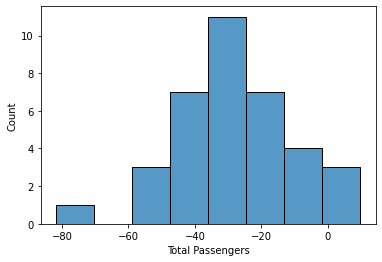

In [ ]:
sns.histplot(data = residuals, x = "Total Passengers")

**Random Walk Pattern of Residuals**

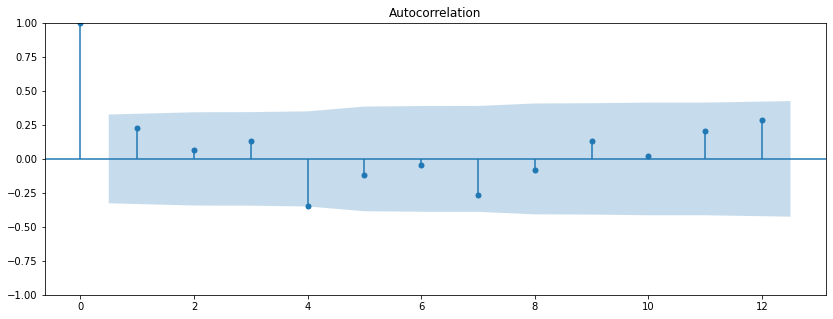

In [ ]:
# ACF plot
plot_acf(
    residuals, 
    lags = 12
).set_size_inches((14,5));

## Model Evaluation

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_prophet) * 100

7.336719006792452

## Task

Do forecasting for Daily Web Visitors data using ARIMA, Holt-Winters, and Prophet to predict number of `unique_visits`. You don't need to use CV for this


In [ ]:
daily_web_visitors = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/time_series_data/daily_website_visitors/daily-website-visitors.csv") 

In [ ]:
daily_web_visitors